### Quantum Cryptography - Day15
# Security Matrics Dashboard
In quantum cryptography ,security is nor evaluated using  a single value.Insteda multiple security matrics are monitored together to understand whether a quantum key distribition (QKD) system is sfa e,efficient and resistent to attack.
In this session, we build a **Security Metrics Dashboard** that visually represents the health if quantum communication channel.This Dashboard mmimc ehat real QKD system use for contineous security monitoring. In this we will learn:
- What **QBER(Quantum Bit Error rate)** error rate indicate about eavesdroppinng 
- How **entrophy** measures randomness and key quality
- How **Key rate** reflects usable secure key generation 
- How to build a **multi-plot security dashboard**
- How to perform **comparartive security analysis**
- How visualization helps detect qunatum attacks

## Import Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Step 1 : Simulate Quantum Channel Data
In real QKD systems, detector record transmmitted and received bits.Errors naturally occure due to noise,hardware imperfection or attacks.

Here we simulate the clean (secure) quantum channel ,a noisy (possibly attacked) quantum chananel.this step is required ,to security matrics require realistic bit-level data and it enables comparision between secure and insecure scenerios ,this help us to create a baseline for security evaluation

In [13]:
np.random.seed(42)
num_bits=1000

##sender bits
alice_bits=np.random.randint(0,2,num_bits)

# CLean channel (low noise)
bob_bits_clean=alice_bits.copy()
noise_indices =np.random.choice(num_bits,size=20,replace=False)
bob_bits_clean[noise_indices] ^=1

# Noisy Channel (high noise/possible attack)
bob_bits_noisy=alice_bits.copy()
attack_indices =np.random.choice(num_bits,size=120,replace=False)
bob_bits_noisy[attack_indices]^=1

## Step 2 : QBER Calculation
QBER is defined as the fraction of bits that differ between senderand receiver.High QBER is the stronfg indicator of evesdropping. QKD protocol define maximum tolarable QBER threshold.This determines whether the key should be accepted or discarded.

In [14]:
def calculation_qber(alice,bob):
    return np.mean(alice!=bob) 
qber_clean=calculation_qber(alice_bits,bob_bits_clean)
qber_noisy=calculation_qber(alice_bits,bob_bits_noisy)
qber_clean,qber_noisy

(np.float64(0.02), np.float64(0.12))

## Step 3 : Compute Shannon Entropy
Entropy measures randomness in the key.Higher entropy means stronger resistance to prediction and attacks.Low entropy indicates  information leakage ,Entropy validates key randomness after error correction,this helps cryptographic strength of generated keys. 

In [16]:
def shannon_entropy(bits,qber):
    values,counts=np.unique(bits,return_counts=True)
    probabilities=counts/counts.sum()
    shannon= -np.sum(probabilities * np.log2(probabilities))
    return(1-qber)*shannon
entropy_clean=shannon_entropy(bob_bits_clean,qber_clean)
entropy_noisy=shannon_entropy(bob_bits_noisy,qber_noisy)
entropy_clean,entropy_noisy

(np.float64(0.9798982009946567), np.float64(0.88))

## Step 4 : Estimate Secure Key Rate
Key rate represents the fraction of transmitted bits that become usable,secure key after error correction and privacy amplification.In this step security useless if key rate is too low,attacks reduce usable key generation,this effect the balance security with system performance

In [17]:
def estimate_key_rate(qber,threshold=0.11):
    if qber>= threshold:
        return 0.0
    return 1-2*qber
key_rate_clean=estimate_key_rate(qber_clean)
key_rate_noisy=estimate_key_rate(qber_noisy)
key_rate_clean,key_rate_noisy

(np.float64(0.96), 0.0)

## Step 5 : Multi-Plot Security Dashboard
A Dashboard allows simulteneous monitoring of multiple security metrics.single metrics can be misleading,combined visualization improves attack detection.Enables real time security decision in QKD System.

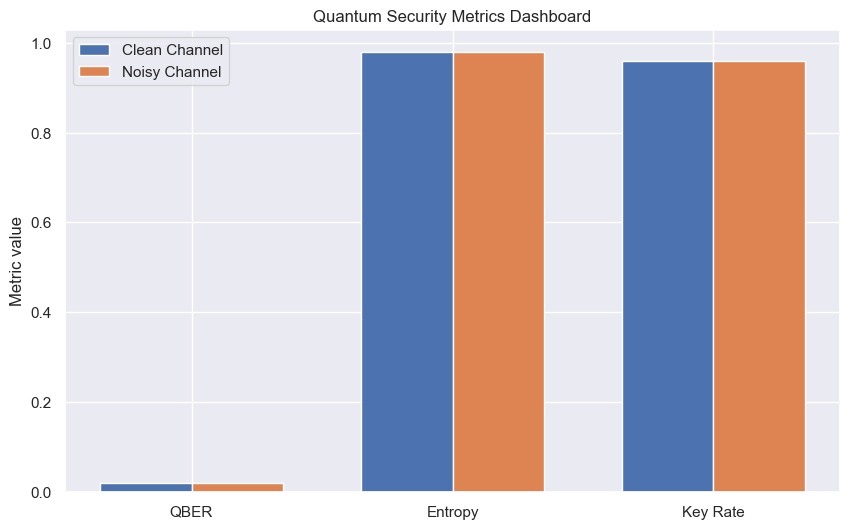

In [18]:
metrics=['QBER','Entropy','Key Rate']
clean_values=[qber_clean,entropy_clean,key_rate_clean]
noisy_values=[qber_noisy,entropy_noisy,key_rate_noisy]

x=np.arange(len(metrics))
width=0.35

plt.figure(figsize=(10,6))
plt.bar(x-width/2,clean_values,width,label='Clean Channel')
plt.bar(x+width/2,clean_values,width,label='Noisy Channel')

plt.xticks(x,metrics)
plt.ylabel('Metric value')
plt.title('Quantum Security Metrics Dashboard')
plt.legend()
plt.show()

## Step 6 : Quantum Error Distribution
Visualizing error position mimic how quantum disturbance spread across a channel.in this step , Quantum attacks introduce non-uniform disturbance ,help visually identify structured attacks.add intuitive unerstanding beyond numbers.

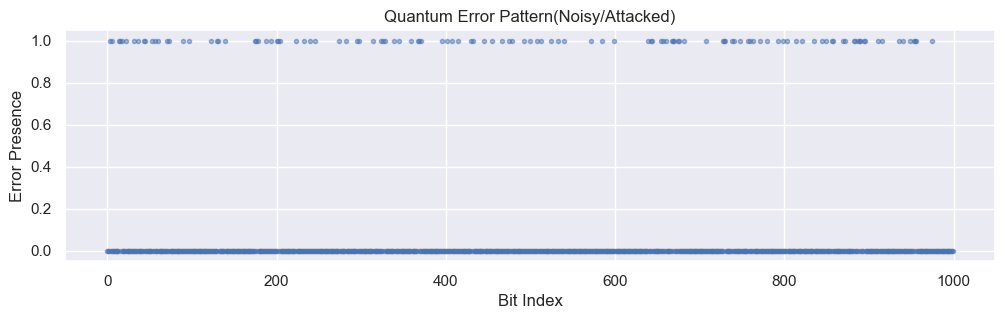

In [19]:
plt.figure(figsize=(12,3))
plt.plot(alice_bits!=bob_bits_noisy,'.',alpha=0.5)
plt.title('Quantum Error Pattern(Noisy/Attacked)')
plt.xlabel("Bit Index")
plt.ylabel("Error Presence")
plt.show()

## Final Analysis
- Clean channel show slow QBER ,high entropy and strong key rate.
- Noisy Channel crosses safe QBER limits
- Entropy reduction indicates information leakage
- Dashboard clearly highlightes security degradation

This demonstrate ,why multi- metric dashboard are essential  in practice qunatum cryptography systems.

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day15_Security_Matrics_Dashboard.ipynb

**Date created**: 09-February-2026

<sub>© Shreya Palase- All Rights Reserved.This notebook is part of a structured learning series designed for Github publication.</sub>